# Project Brief


Congratulations, you have landed your first job as a data scientist at National Accessibility! National Accessibility currently installs wheelchair ramps for office buildings and schools. However, the marketing manager wants the company to start installing ramps for event venues as well. According to a new survey, approximately 40% of event venues are not wheelchair accessible. However, it is not easy to know whether a venue already has a ramp installed. 

The marketing manager would like to know whether you can develop a model to predict whether an event venue has a wheelchair ramp. To help you with this, he has provided you with a dataset of London venues. This data includes whether the venue has a ramp.

It is a waste of time to contact venues that already have a ramp installed, and it also looks bad for the company. Therefore, it is especially important to exclude locations that already have a ramp. Ideally, at least two-thirds of venues predicted to be without a ramp should not have a ramp. 

You will need to present your findings in two formats:
- First, you will need to present your findings to the marketing manager via a 10 minute oral presentation. The owner has no technical data science background. 
- You will also need to submit a technical report to your manager, who does have a strong technical data science background.

The data you will use for this analysis can be accessed here: `"data/event_venues.csv"`

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import math

In [2]:
# Loading data
df = pd.read_csv('data/event_venues.csv')
df

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,False,0,True,False,35.045455,0,112.715867,False,False
1,green rooms hotel,True,1,True,False,40.000000,120,80.000000,True,False
2,148 leadenhall street,False,0,True,False,35.045455,0,112.715867,False,False
3,conway hall,False,0,True,False,35.045455,60,60.000000,False,False
4,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False
...,...,...,...,...,...,...,...,...,...,...
3905,the hurlingham club,True,1,True,False,40.000000,450,450.000000,False,True
3906,"landmark - aldgate, london",False,0,True,False,28.000000,0,28.000000,False,True
3907,ortus conference and events venue,False,1,True,False,13.000000,20,20.000000,False,True
3908,30 euston square,False,1,True,False,8.000000,20,20.000000,False,True


# Data Exploratory Analysis
In this part we will analyse our data, and try to clean it

In [3]:
df.shape

(3910, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   venue_name                  3910 non-null   object 
 1   Loud music / events         3910 non-null   bool   
 2   Venue provides alcohol      3910 non-null   int64  
 3   Wi-Fi                       3910 non-null   bool   
 4   supervenue                  3910 non-null   bool   
 5   U-Shaped_max                3910 non-null   float64
 6   max_standing                3910 non-null   int64  
 7   Theatre_max                 3910 non-null   float64
 8   Promoted / ticketed events  3910 non-null   bool   
 9   Wheelchair accessible       3910 non-null   bool   
dtypes: bool(5), float64(2), int64(2), object(1)
memory usage: 172.0+ KB


In [5]:
df.isnull().sum()

venue_name                    0
Loud music / events           0
Venue provides alcohol        0
Wi-Fi                         0
supervenue                    0
U-Shaped_max                  0
max_standing                  0
Theatre_max                   0
Promoted / ticketed events    0
Wheelchair accessible         0
dtype: int64

In [6]:
df.describe()

,Venue provides alcohol,U-Shaped_max,max_standing,Theatre_max
count,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.713299,35.045455,114.203581,112.715867
std,0.452278,43.937591,272.269943,131.853249
min,0.000000,1.000000,0.000000,1.000000
25%,0.000000,35.045455,0.000000,80.000000
50%,1.000000,35.045455,50.000000,112.715867
75%,1.000000,35.045455,120.000000,112.715867
max,1.000000,2520.000000,7500.000000,4000.000000


let's see how many places are wheelchair accessible

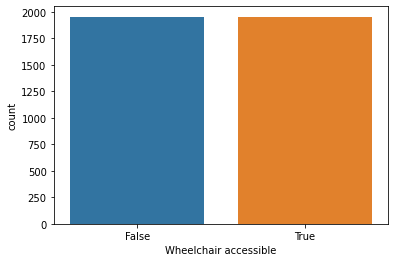

In [7]:


sns.countplot(data=df, x='Wheelchair accessible')
plt.show()

we get a 50/50

let's change True/False(boolean) values into 0/1(int) values

In [8]:
df = df.replace(to_replace={"Promoted / ticketed events": {False: 0, True: 1},
                            'supervenue': {False: 0, True: 1}, 
                            'Wheelchair accessible': {False: 0, True: 1},
                            'Loud music / events': {False: 0, True: 1},
                            'Wi-Fi': {False: 0, True: 1}
                           })
df

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,0,0,1,0,35.045455,0,112.715867,0,0
1,green rooms hotel,1,1,1,0,40.000000,120,80.000000,1,0
2,148 leadenhall street,0,0,1,0,35.045455,0,112.715867,0,0
3,conway hall,0,0,1,0,35.045455,60,60.000000,0,0
4,gridiron building,0,0,1,0,35.045455,0,112.715867,0,0
...,...,...,...,...,...,...,...,...,...,...
3905,the hurlingham club,1,1,1,0,40.000000,450,450.000000,0,1
3906,"landmark - aldgate, london",0,0,1,0,28.000000,0,28.000000,0,1
3907,ortus conference and events venue,0,1,1,0,13.000000,20,20.000000,0,1
3908,30 euston square,0,1,1,0,8.000000,20,20.000000,0,1


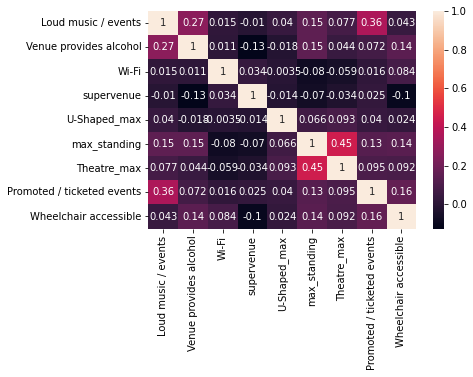

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Checking the distribution of each feature:

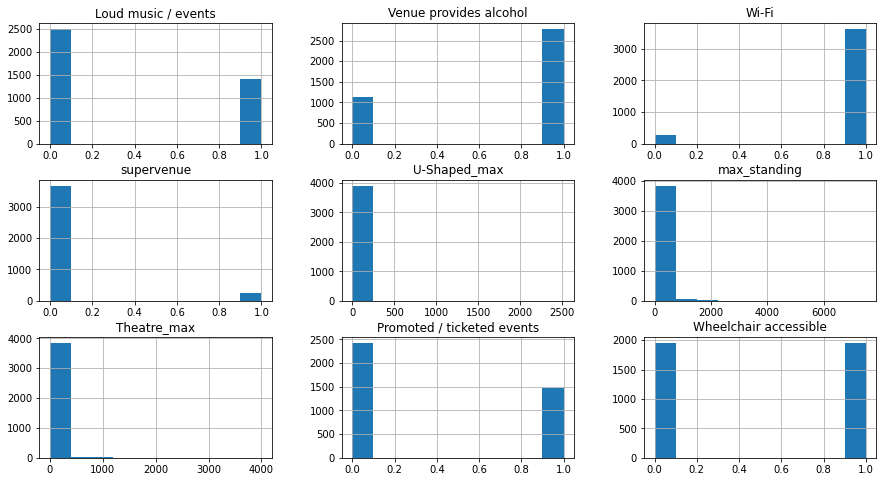

In [10]:
df.hist(figsize=(15, 8))
plt.show()

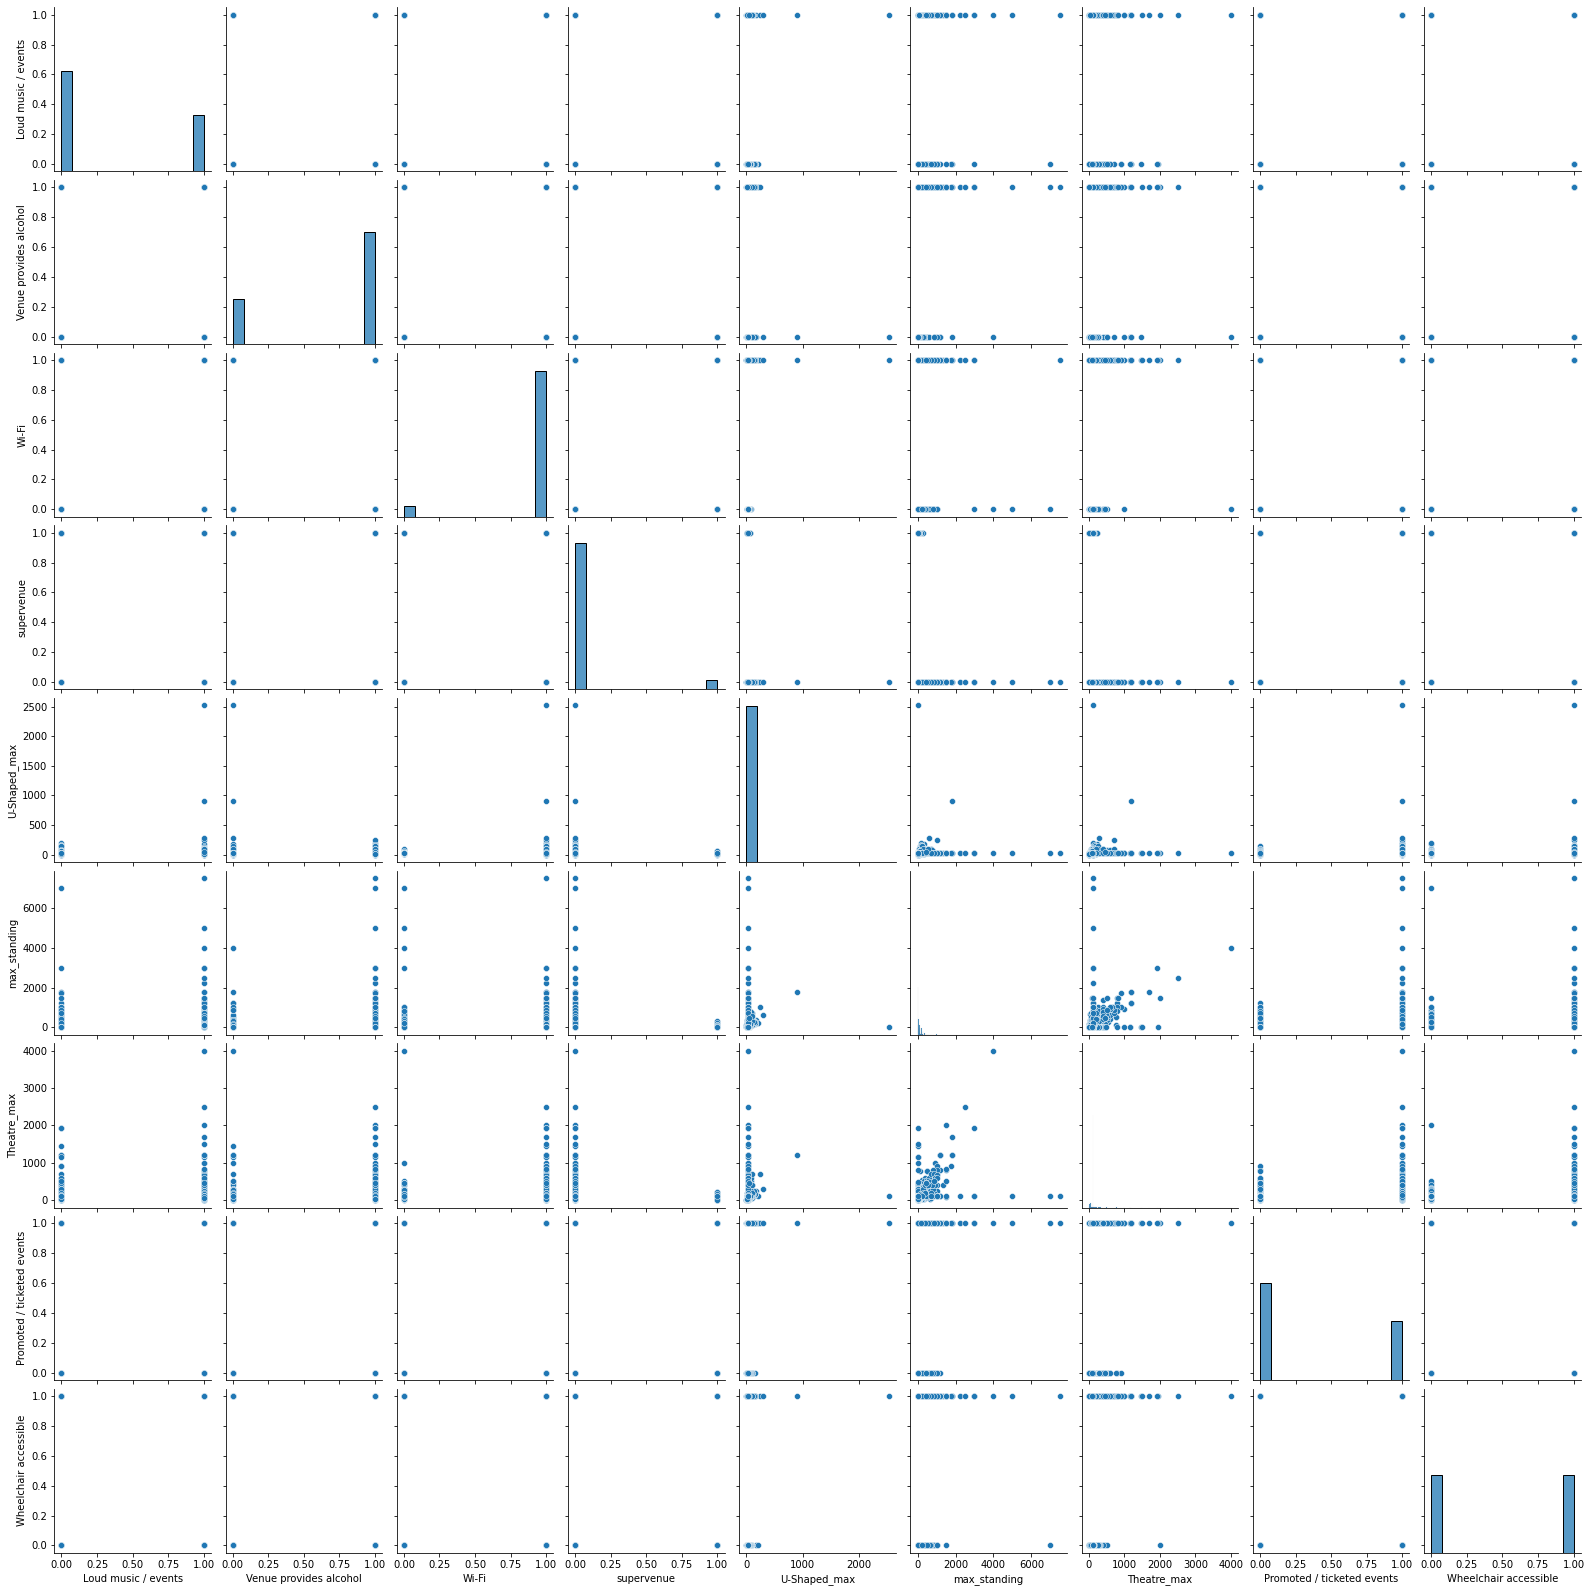

In [11]:
sns.pairplot(df)
plt.show()

# Model developement
In this section we will try to fit two models for our predictive dataset, and compare the accuracy score of the two

In [12]:
df = pd.get_dummies(df, columns=["venue_name"])

In [13]:
X = df.drop("Wheelchair accessible", axis=1)
y = df["Wheelchair accessible"]

In [14]:
y = pd.get_dummies(y)
y

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3905,0,1
3906,0,1
3907,0,1
3908,0,1


In [15]:
y.shape

(3910, 2)

In [16]:
y = y.iloc[:, 1:2]

In [17]:
y = np.array(y).reshape(3910)

# MaxAbsScaler

Scale each feature by its maximum absolute value.

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

In [18]:
scaler = MaxAbsScaler()
scaler.fit(X)
scaled = scaler.transform(X)
scaled_df = pd.DataFrame(scaled, columns=X.columns)

In [19]:
scaled_df

,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,venue_name_1 cornhill,venue_name_1 king street,...,venue_name_ye olde watling,venue_name_yogalondon studio,venue_name_your army ltd - tileyard studios,venue_name_yoyo studio,venue_name_yuu kitchen,venue_name_zapspace trampoline park,venue_name_zentar uk,venue_name_zinnia gardens,venue_name_zsl london zoo,venue_name_{10-11} carlton house terrace
0,0.0,0.0,1.0,0.0,0.013907,0.000000,0.028179,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.015873,0.016000,0.020000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.013907,0.000000,0.028179,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.013907,0.008000,0.015000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.013907,0.000000,0.028179,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,1.0,1.0,0.0,0.015873,0.060000,0.112500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3906,0.0,0.0,1.0,0.0,0.011111,0.000000,0.007000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3907,0.0,1.0,1.0,0.0,0.005159,0.002667,0.005000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3908,0.0,1.0,1.0,0.0,0.003175,0.002667,0.005000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1 Logistic Regression

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [20]:
clf = LogisticRegression(random_state=0).fit(scaled_df, y)
clf.score(scaled_df, y)

0.8951406649616368

# 2 KNN Classifier

In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method. It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set

our first step will be splitting our data into train, and test, with 40% of the data for test

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.4)

# StandardScaler

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [23]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
math.sqrt(len(y_test))

39.54743986657038

Let's instanciate our KNN Classifier, and fit it into our train data

In [24]:
classifier = KNeighborsClassifier(n_neighbors = 1, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

Now let's predict using our classifier the test data

In [25]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=uint8)

In [26]:
print(accuracy_score(y_test,y_pred))

0.7819693094629157


# Conclusion

In this report we were able to build two models that can predict places without wheelchair, The first model gave us an accuracy of 89% while the second one gave us ~80% accuracy, both can be used or that matter, but preffered to use the LogisticRegression model